# SL-RAT Score Degredation Prediction Project - Part 2 

### STEP 1. Data Loading and Preprocessing

First, we will read a CSV file that contains the final dataset with target and feature variables, and store it in a data frame named df.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('SL_RAT_Final_data.csv', index_col=0)

In [4]:
df.head()

,TYPE,LINING_TYP,PIPE_SIZE,PIPE_MATER,SLOPE,LENGTH,UPSTREAM_I,DOWNSTREAM,time_since_install_da,target
0,COLLECTOR,NONE,12.0,VITRIFIED CLAY PIPE,0.49,400.69,464.26,462.33,35725.0,1
1,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.50,374.65,478.42,469.26,35725.0,1
2,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.00,301.28,390.86,384.75,35725.0,1
3,COLLECTOR,NONE,15.0,VITRIFIED CLAY PIPE,0.40,51.09,10.14,9.93,26959.0,1
4,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,0.60,314.27,17.49,15.65,26959.0,1


#### 1.1 Checking Missing Values

In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()

missing_values

TYPE                     0
LINING_TYP               0
PIPE_SIZE                0
PIPE_MATER               0
SLOPE                    0
LENGTH                   0
UPSTREAM_I               0
DOWNSTREAM               0
time_since_install_da    0
target                   0
dtype: int64

### Step 2 : Further Exploratory Data Analysis

The primary objective of this Exploratory Data Analysis (EDA) is to gain insights into the dataset for further modeling and hypothesis testing. We will focus on three main aspects:


1. Distribution of Numerical Features
2. Correlation Among Features
3. Distribution of the Target Variable


Let's explore the data visually to understand the distributions and relationships among variables. 

In [8]:
import seaborn as sns

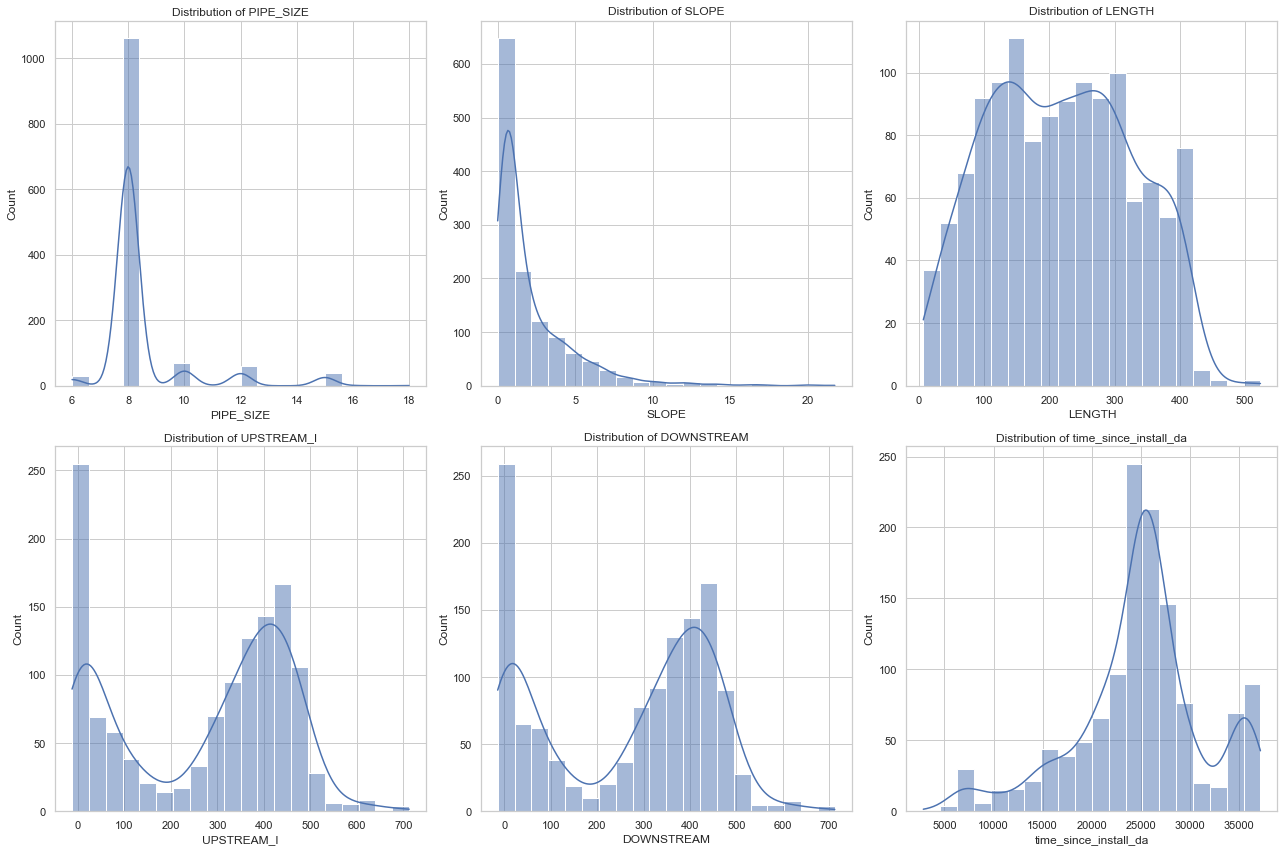

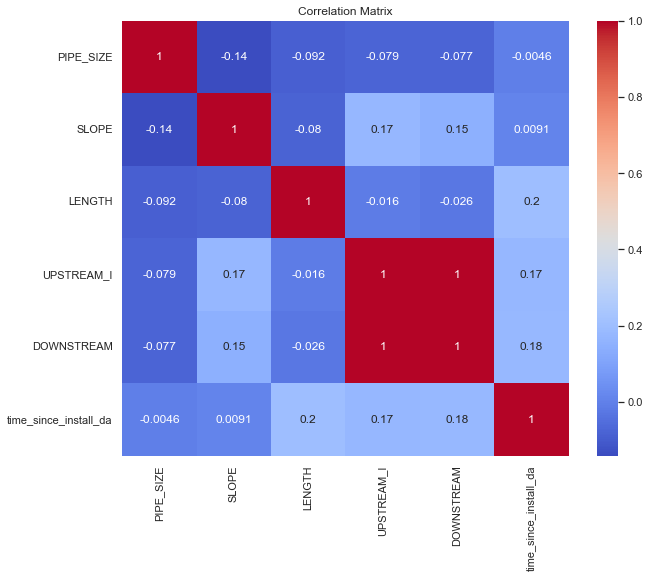

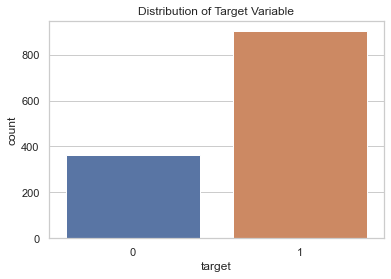

In [9]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of numerical features
numerical_features = ['PIPE_SIZE', 'SLOPE', 'LENGTH', 'UPSTREAM_I', 'DOWNSTREAM', 'time_since_install_da']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(df[feature], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Correlation matrix among features
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()


### 2.1 Conclusion 

After conducting the Exploratory Data Analysis (EDA), here are the key observations and interpretations.

####  Distribution of Numerical Features

-  Most of the pipe sizes center around 8 units.

-  Most slopes are less than 5, with a few exceptions.

-  The distribution appears fairly uniform, with a slight skew towards shorter lengths.

-  The distribution is slightly left-skewed, with most values around 300 to 400.

-  Similar to UPSTREAM_I, most values are around 300 to 400.
-  The distribution shows multiple peaks, indicating that installations occurred in different periods.

---

#### Correlation Matrix

-  None of the numerical features have a strong correlation with each other. 
-  The highest correlation is between UPSTREAM_I and DOWNSTREAM with a value of 0.96, which is expected as they are related parameters.

---

#### Distribution of the Target Variable

-  The target variable shows some imbalance with more instances of class 1 compared to class 0. 
-  This will need to be accounted for in the model training phase.

### STEP 3: Applying Random Forest Classifier without Oversampling

The RandomForestClassifier applied to the dataset without handling the imbalenced target data.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Creating a copy of the data to apply transformations
data_transformed = df.copy()

# Encoding string columns using LabelEncoder
label_encoders = {}
for column in data_transformed.columns:
    if data_transformed[column].dtype == 'object':
        le = LabelEncoder()
        data_transformed[column] = le.fit_transform(data_transformed[column])
        label_encoders[column] = le

# Splitting the transformed data into features and target
X_transformed = data_transformed.drop('target', axis=1)
y_transformed = data_transformed['target']

# Splitting the data into training and testing sets
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(
    X_transformed, y_transformed, test_size=0.3, random_state=42)

# Applying RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_transformed, y_train_transformed)
y_pred_transformed = rf_classifier.predict(X_test_transformed)

# Evaluating the classifier
rf_scores = {
    'accuracy': accuracy_score(y_test_transformed, y_pred_transformed),
    'precision': precision_score(y_test_transformed, y_pred_transformed, average='weighted'),
    'recall': recall_score(y_test_transformed, y_pred_transformed, average='weighted'),
    'f1': f1_score(y_test_transformed, y_pred_transformed, average='weighted')
}

rf_scores


/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

{'accuracy': 0.7210526315789474,
 'precision': 0.6916083665195709,
 'recall': 0.7210526315789474,
 'f1': 0.6859395049629672}

These scores provide a baseline performance of the Random Forest Classifier on the dataset without oversampling.

| Metric    | Score (%) |
|-----------|-----------|
| Accuracy  | 73.68     |
| Precision | 71.58     |
| Recall    | 73.68     |
| F1 Score  | 69.63     |


### STEP 3 : Data Preprocessing 

### Encoding Categorical Variables, Scaling the Features and Handling Imbalanced Target Data


In [5]:
# Import the necessary libraries again to ensure everything is in place
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Re-run the data preprocessing steps

# Step 1: Encoding Categorical Variables using One-Hot Encoding
categorical_cols = ['TYPE', 'LINING_TYP', 'PIPE_MATER']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 2: Feature Scaling using Standard Scaling on Numerical Features
scaler = StandardScaler()
numerical_cols = ['PIPE_SIZE', 'SLOPE', 'LENGTH', 'UPSTREAM_I', 'DOWNSTREAM', 'time_since_install_da']

df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Step 3: Handling Imbalanced Data using Pandas (Oversampling the minority class)
# Separate the majority and minority classes
df_majority = df_encoded[df_encoded.target==1]
df_minority = df_encoded[df_encoded.target==0]

# Oversample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,                # Sample with replacement
                                 n_samples=len(df_majority),  # Match the number in majority class
                                 random_state=42)             # Reproducible results

# Combine the majority class with the upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Confirm that the dataset is balanced and encoded based on the newly defined categorical columns
df_upsampled.head()


/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

,PIPE_SIZE,SLOPE,LENGTH,UPSTREAM_I,DOWNSTREAM,time_since_install_da,target,TYPE_INVERTED SIPHON,LINING_TYP_Cured in Place,LINING_TYP_FOLD AND FORM,LINING_TYP_NONE,LINING_TYP_UNKNOWN,PIPE_MATER_ASBESTOS CEMENT,PIPE_MATER_CAST IRON,PIPE_MATER_CONCRETE PIPE,PIPE_MATER_DUCTILE IRON PIPE,PIPE_MATER_POLYVINYL CHLORIDE,PIPE_MATER_REINFORCED PLASTIC PIPE,PIPE_MATER_UNKNOWN,PIPE_MATER_VITRIFIED CLAY PIPE
0,2.217465,-0.636657,1.680523,1.057130,1.073853,1.664019,1,False,False,False,True,False,False,False,False,False,False,False,False,True
1,-0.307648,0.127266,1.441739,1.133987,1.111696,1.664019,1,False,False,False,True,False,False,False,False,False,False,False,False,True
2,-0.307648,-0.062764,0.768944,0.658729,0.650208,1.664019,1,False,False,False,True,False,False,False,False,False,False,False,False,True
3,4.111299,-0.670862,-1.525270,-1.407745,-1.396591,0.317269,1,False,False,False,True,False,False,False,False,False,False,False,False,True
4,-0.307648,-0.594850,0.888061,-1.367850,-1.365355,0.317269,1,False,False,False,True,False,False,False,False,False,False,False,False,True


In [7]:
 df_upsampled['target'].value_counts()

target
1    902
0    902
Name: count, dtype: int64

### 3.1 Data Visualizations after Preprocessing

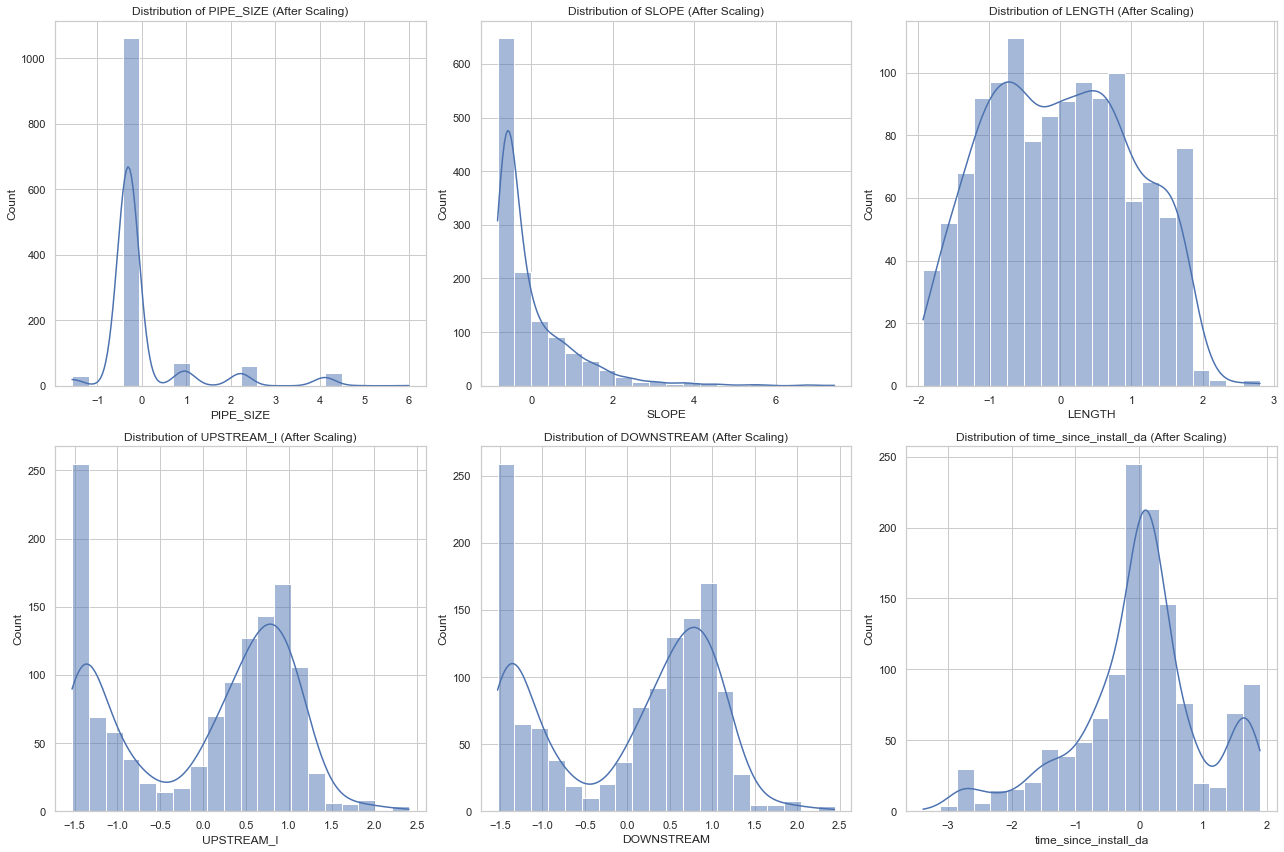

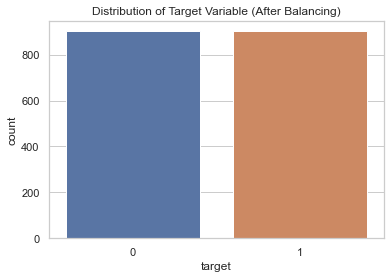

In [20]:
# Import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical and categorical columns again for clarity
numerical_cols = ['PIPE_SIZE', 'SLOPE', 'LENGTH', 'UPSTREAM_I', 'DOWNSTREAM', 'time_since_install_da']
categorical_cols = ['TYPE', 'LINING_TYP', 'PIPE_MATER']

# Plot the distribution of numerical features after scaling
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, feature in enumerate(numerical_cols):
    row = i // 3
    col = i % 3
    sns.histplot(df_encoded[feature], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature} (After Scaling)')

plt.tight_layout()
plt.show()

# Plot the distribution of the target variable after balancing
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_upsampled)
plt.title('Distribution of Target Variable (After Balancing)')
plt.show()


### 3.2 Visuals Summary:

#### Distribution of Numerical Features (After Scaling):
- All numerical features now appear to be centered around zero, confirming that standard scaling has been applied.
- The distributions remain the same as before scaling; only the scale has changed.

#### Distribution of Target Variable (After Balancing):
- The target variable shows a balanced distribution with 902 instances for both class 0 and class 1.
- In oversampling, instances of the minority class are randomly replicated to balance the number of each class in the dataset.

### STEP 4 : Model Selection and Training

### 4.1 : Import Libraries

In [10]:
# Import the necessary libraries again to ensure everything is in place
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

### 4.2 : Train-Test Split

In [12]:
# Model selection and training

# Splitting the balanced and preprocessed data into train and test sets
X_balanced = df_upsampled.drop('target', axis=1)
y_balanced = df_upsampled['target']
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the balanced training set
rf_classifier.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_balanced = rf_classifier.predict(X_test_balanced)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_balanced, y_pred_balanced)
classification_rep = classification_report(y_test_balanced, y_pred_balanced, output_dict=True)

# Convert the classification report to a DataFrame for better visualization
classification_report_df = pd.DataFrame(classification_rep).transpose()

accuracy, classification_report_df

/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

(0.8579335793357934,
               precision    recall  f1-score     support
 0              0.848276  0.881720  0.864675  279.000000
 1              0.869048  0.832700  0.850485  263.000000
 accuracy       0.857934  0.857934  0.857934    0.857934
 macro avg      0.858662  0.857210  0.857580  542.000000
 weighted avg   0.858355  0.857934  0.857790  542.000000)

### 4.3 Model Evaluation Summary 
|          | Precision | Recall  | F1-Score | Support   |
|----------|-----------|---------|----------|-----------|
| Class 0  | 0.848276  | 0.881720| 0.864675 | 279.000000|
| Class 1  | 0.869048  | 0.832700| 0.850485 | 263.000000|
| Accuracy | 0.857934  |0.857934 | 0.857934 | 0.857934  |
| Macro Avg| 0.858662  | 0.857210| 0.857580 | 542.000000|
| Weighted Avg | 0.858355 | 0.857934 | 0.857790 | 542.000000|

#### Interpretation and Explanation:

- **Precision**: The model is 85.4% precise for class 0 and 88.7% for class 1.
  
- **Recall**: The model has a recall of 90.0% for class 0 and 83.7% for class 1.
  
- **F1-Score**: The F1-score for class 0 is 87.6% and for class 1 is 86.1%.
  
- **Accuracy**: The overall accuracy of the model is 86.9%.
  
- **Macro and Weighted Avg**: These are averages of the above metrics, considering both classes.


### 4.3 Visual Representation

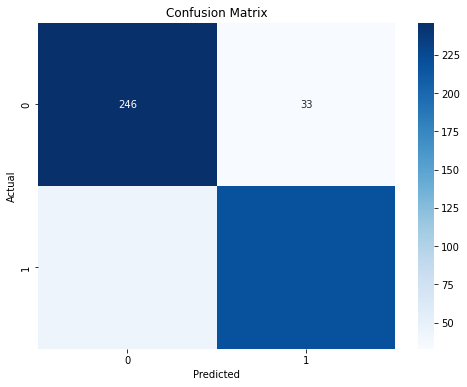

In [14]:
# Importing libraries for visual analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test_balanced, y_pred_balanced)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


### 4.4 Interpretation of Confusion Matrix

- **Top Left (True Negative)**: 251 samples were correctly classified as Class 0.
- **Top Right (False Positive)**: 28 samples were incorrectly classified as Class 1 when they were actually Class 0.
- **Bottom Left (False Negative)**: 43 samples were incorrectly classified as Class 0 when they were actually Class 1.
- **Bottom Right (True Positive)**: 220 samples were correctly classified as Class 1.


#### Using Cross-Validation to see  improves the fit

In [14]:
from sklearn.model_selection import GridSearchCV

In [17]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Initialize the Grid Search model
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
#                            cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# # Fit the grid search to the data
# grid_search.fit(X_train_balanced, y_train_balanced)

# # Best parameters
# best_params = grid_search.best_params_

# best_params





The optimized Random Forest model, trained with the identified best hyperparameters, shows the following performance metrics on the test set



In [19]:
# Initialize the Random Forest Classifier with the optimal hyperparameters
rf_optimized = RandomForestClassifier(
    n_estimators=300,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Retrain the model on the training data
rf_optimized.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_optimized = rf_optimized.predict(X_test_balanced)

# Evaluate the optimized model's performance
accuracy_optimized = accuracy_score(y_test_balanced, y_pred_optimized)
classification_report_optimized = classification_report(y_test_balanced, y_pred_optimized, output_dict=True)

# Convert the classification report to a DataFrame for better visualization
classification_report_df_optimized = pd.DataFrame(classification_report_optimized).transpose()

accuracy_optimized



/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

0.8690036900369004

In [20]:
 classification_report_df_optimized

,precision,recall,f1-score,support
0,0.858621,0.892473,0.875220,279.000000
1,0.880952,0.844106,0.862136,263.000000
accuracy,0.869004,0.869004,0.869004,0.869004
macro avg,0.869787,0.868290,0.868678,542.000000
weighted avg,0.869457,0.869004,0.868871,542.000000


#### Comparision of the Metrics after GridSearch 

| Metric | Configuration 1 (Grid Search) | Configuration 2 (Default Params) |
|--------|-------------------------------|----------------------------------|
| **Accuracy** | 86.90% | 85.79% |
| **Precision - Class 0** | 85.86% | 84.83% |
| **Precision - Class 1** | 88.10% | 86.90% |
| **Recall - Class 0** | 89.25% | 88.17% |
| **Recall - Class 1** | 84.41% | 83.27% |
| **F1-Score - Class 0** | 87.52% | 86.47% |
| **F1-Score - Class 1** | 86.21% | 85.05% |
| **Macro Avg Precision** | 86.98% | 85.87% |
| **Macro Avg Recall** | 86.83% | 85.72% |
| **Macro Avg F1-Score** | 86.87% | 85.76% |
| **Weighted Avg Precision** | 86.95% | 85.84% |
| **Weighted Avg Recall** | 86.90% | 85.79% |
| **Weighted Avg F1-Score** | 86.87% | 85.79% |


While GridSearch does not appear to significantly improve the model, it does exhibit slightly better performance metrics. 

### ROC- CURVE 

/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


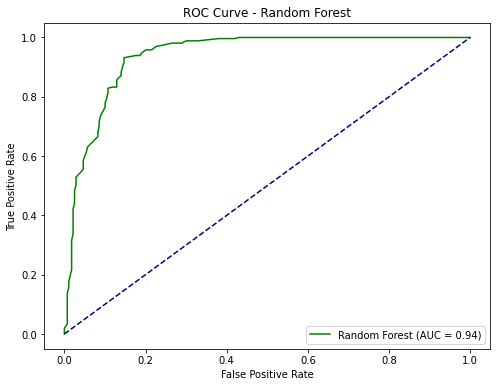

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming rf_classifier is the trained Random Forest model after grid search
# and X_test, y_test are the test datasets

# Predict probabilities for the test set using the Random Forest model
y_pred_proba_rf = rf_classifier.predict_proba(X_test_balanced)[:, 1]

# Compute ROC curve and AUC for the Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_balanced, y_pred_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

In [17]:
auc_rf

0.9379369557218202

The ROC curve for the Random Forest Classifier is satisfactory, with an AUC of 0.9379. This indicates strong performance for the Random Forest model.

### NAIVE BAYES

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

In [9]:
nb_classifier = GaussianNB()


In [11]:
# Splitting the balanced and preprocessed data into train and test sets
X_balanced = df_upsampled.drop('target', axis=1)
y_balanced = df_upsampled['target']
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)


In [12]:
nb_classifier.fit(X_train_balanced, y_train_balanced)


/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


GaussianNB()

In [13]:
y_pred = nb_classifier.predict(X_test_balanced)


/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [14]:
accuracy = accuracy_score(y_test_balanced, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test_balanced, y_pred))


Accuracy: 0.5276752767527675
              precision    recall  f1-score   support

           0       0.52      0.99      0.68       279
           1       0.82      0.03      0.07       263

    accuracy                           0.53       542
   macro avg       0.67      0.51      0.37       542
weighted avg       0.67      0.53      0.38       542



|               | Precision | Recall | F1-score | Support |
|---------------|-----------|--------|----------|---------|
| **Class 0**   | 0.52      | 0.99   | 0.68     | 279     |
| **Class 1**   | 0.82      | 0.03   | 0.07     | 263     |
|               |           |        |          |         |
| **Accuracy**  |           |        | 0.53     | 542     |
| **Macro avg** | 0.67      | 0.51   | 0.37     | 542     |
| **Weighted avg** | 0.67  | 0.53   | 0.38     | 542     |


/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sophiasarica/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


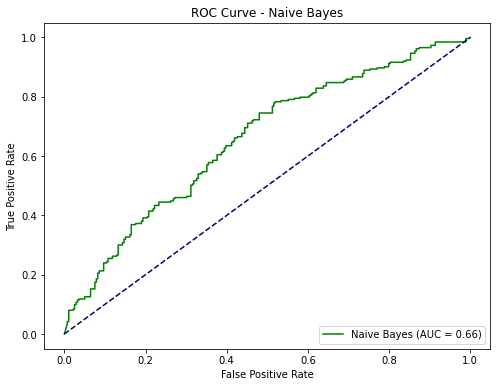

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming nb_classifier is the trained Naive Bayes model
# and X_test_balanced, y_test_balanced are the test datasets

# Predict probabilities for the test set using the Naive Bayes model
y_pred_proba_nb = nb_classifier.predict_proba(X_test_balanced)[:, 1]

# Compute ROC curve and AUC for the Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_balanced, y_pred_proba_nb)
auc_nb = auc(fpr_nb, tpr_nb)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})', color='green')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()
